### Processanmento dos dados validados pelo pnboia das boias de rig, fln e san

- Periodo: 2012/02/01 a 2012/06/30
- Utilizado para o artigo Wave Observation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pylab as pl
import matplotlib.dates as mdates
from scipy.stats import norm,rayleigh, gaussian_kde
from matplotlib import mlab
import matplotlib.pyplot as plt
import scipy.ndimage
from scipy.ndimage.filters import gaussian_filter
import proconda
import windrose
from windrose import WindroseAxes
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import xarray as xray

In [2]:
pathname_fig = '../doc/rev06/latex/'

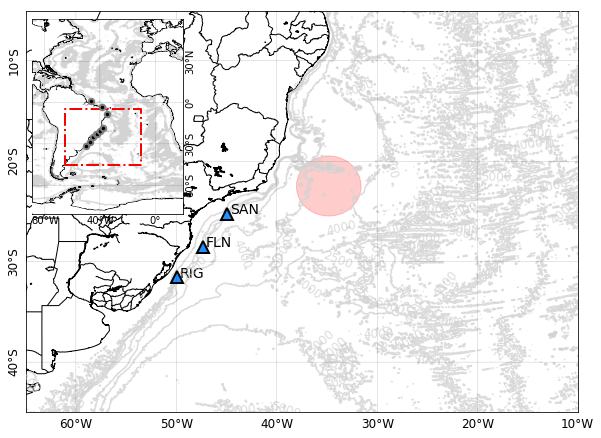

In [3]:
# plota figura de localizacao com tamanho do grid do modelo

DATADIR = os.environ['HOME'] + '/Dropbox/database/ETOPO/'


#### SE Shelf - Etopo1
#Alims = [-48.95, -38.54, -25.14, -18.15]
# Alims = [-56., -33, -36.00, 2.00]
Alims = [-90, 20, -80, 60]
etopo = DATADIR + 'ETOPO-REMO.nc'
etopo = xray.open_dataset(etopo).sel( lon=slice(Alims[0],Alims[1] ), lat=slice(Alims[2],Alims[3]) )
Etopo = etopo.z.values
Elon, Elat = np.meshgrid( etopo.lon, etopo.lat )

sx, sy = [-47.4,-28.5]

pnboia = {
          'riogrande'  : [-31.566, -49.966],
          'florian'    : [-28.500, -47.366],
          'santos'     : [-25.283, -44.933],
          'bguan'      : [-22.924, -43.150], 
          'cabofrio'   : [-22.995, -42.187], 
          'vitoria'    : [-20.278, -39.727], 
          'portoseg'   : [-18.151, -37.944], 
          'recife'     : [-08.149, -34.560], 
          'fortaleza'  : [-02.987, -38.819],
          'barranorte' : [+01.094, -46.350]
         }

ay, ax = pnboia['riogrande']
by, bx = pnboia['florian']
cy, cx = pnboia['santos']
dy, dx = pnboia['bguan']
ey, ex = pnboia['cabofrio']
fy, fx = pnboia['vitoria']
gy, gx = pnboia['portoseg']
hy, hx = pnboia['recife']
iy, ix = pnboia['fortaleza']
jy, jx = pnboia['barranorte']

m1 = Basemap(projection='cyl', resolution='h', llcrnrlon=Alims[0]+.5,\
            llcrnrlat=Alims[2]-.5, urcrnrlon=Alims[1]+.5, urcrnrlat=Alims[3]+.5)

Lims = [-65.0, -10.0, -45.0, -5.0 ]

m2 = Basemap(projection='cyl', resolution='h', llcrnrlon=Lims[0],\
                        llcrnrlat=Lims[2], urcrnrlon=Lims[1], urcrnrlat=Lims[3])

axmin, axmax = Lims[0], Lims[1]
aymin, aymax = Lims[2], Lims[3]

axs = [axmin,axmax,axmax,axmin,axmin]
ays = [aymin,aymin,aymax,aymax,aymin]

fig = plt.figure(figsize=(9,6), facecolor='w')

# Larger Map

ax1 = fig.add_subplot(111)

m2.drawcoastlines(linewidth=1)
m2.drawstates(linewidth=1, zorder=12)
cs = m2.contour( Elon, Elat, Etopo*-1, [100, 200, 500, 1000, 2500, 4000, 5000],
                colors='lightgray', linewidth=.7, alpha=0.8 )
cs.clabel(fmt='%i', fontsize=12)

m2.plot(ax, ay, '^', markerfacecolor='dodgerblue', markeredgecolor='k', mew=2, markersize=12)
ax1.text(ax+0.3, ay, 'RIG', fontsize=14)
m2.plot(bx, by, '^', markerfacecolor='dodgerblue', markeredgecolor='k', mew=2, markersize=12)
ax1.text(bx+0.3, by, 'FLN', fontsize=14)
m2.plot(cx, cy, '^', markerfacecolor='dodgerblue', markeredgecolor='k', mew=2, markersize=12)
ax1.text(cx+0.3, cy, 'SAN', fontsize=14)

# campos basin
m2.tissot(-34.83, -22.47, 3, 30, color='r', alpha=0.2)


m2lons = [-60, -50, -40, -30, -20, -10]
m2lats = [-40, -30, -20, -10]


m2.drawparallels( m2lats, labels=[1,0,0,0], fmt='%i', 
                    linewidth=0.2, fontsize=12, rotation=90, zorder=20)
m2.drawmeridians( m2lons, labels=[0,0,0,1], fmt='%i',
                    linewidth=0.2, fontsize=12, zorder=20)

# Smaller Map

ax2  = fig.add_axes([-0.035, 0.51, 0.5, 0.45]) #l,b,w,h

# m1.drawstates(linewidth=1, zorder=12)
m1.fillcontinents(color='w', zorder=11)
m1.drawcoastlines(linewidth=1, zorder=10)

cs = m1.contour( Elon, Elat, Etopo*-1, [200, 2000, 5000], colors='lightgray', linewidth=.7, alpha=0.8 )

m1.plot(axs, ays, lw=2, color='r', linestyle='-.', latlon=True, zorder=13)

mk = 5.5

m1.plot(ax, ay, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(bx, by, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(cx, cy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(dx, dy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(ex, ey, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(fx, fy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(gx, gy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(hx, hy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(ix, iy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)
m1.plot(jx, jy, 'o', markerfacecolor='k', markeredgecolor='grey', mew=2, markersize=mk, zorder=14)

m1.drawparallels( [-60, -30, 0, 30], labels=[0,1,1,1], fmt='%i', 
                    linewidth=0.2, fontsize=10, rotation=90, zorder=20)
m1.drawmeridians( [-80, -40, 0], labels=[0,0,0,1], fmt='%i',
                    linewidth=0.2, fontsize=10, zorder=20)



fig.subplots_adjust(top=0.98, bottom=0.05, left=0.04, right=0.99, wspace=0.2, hspace=0.15)

# fig.savefig('../fig/location_map.png', format='png', dpi=1200, bbox_inches='tight')
# fig.savefig('../fig/location_map.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig.savefig('../doc/rev05/latex/fig/location_map.eps', format='eps', dpi=300, bbox_inches='tight')
fig.savefig(pathname_fig + 'location_map.jpg', format='jpeg', bbox_inches='tight')

plt.show()

In [4]:
# carrega dados processados das boias

#carrega dados da boia
pathname = os.environ['HOME'] + '/Dropbox/database/PNBOIA/proc/'

rig = pd.read_csv(pathname + 'rig_8_lioc.csv', parse_dates=['date'], index_col='date')
fln = pd.read_csv(pathname + 'fln_8_lioc.csv', parse_dates=['date'], index_col='date')
san = pd.read_csv(pathname + 'san_8_lioc.csv', parse_dates=['date'], index_col='date')

# seleciona datas de periodos simultaneos
aux1 = '2012-02-01 01:00:00'
aux2 = '2012-06-30 23:00:00'

rig = rig.loc[aux1:aux2]
fln = fln.loc[aux1:aux2]
san = san.loc[aux1:aux2]

# corrige a declinacao magnetica
rig.dp = rig.dp - 17
fln.dp = fln.dp - 20
san.dp = san.dp - 22

rig.dp.loc[rig.dp < 0] = rig.dp.loc[rig.dp < 0] + 360
fln.dp.loc[fln.dp < 0] = fln.dp.loc[fln.dp < 0] + 360
san.dp.loc[san.dp < 0] = san.dp.loc[san.dp < 0] + 360

# remove da data do dia 29/02 (pq nao tem no modelo)
rig = rig.drop(rig['2012-02-29'].index)
fln = fln.drop(fln['2012-02-29'].index)
san = san.drop(san['2012-02-29'].index)

In [5]:
# carrega os resultados da modelagem com st4

pathnamem = os.environ['HOME'] + '/Dropbox/waveobs/data/ww3/ST4155/pontos/'

direm = np.sort(os.listdir(pathnamem))

parse = lambda x: datetime.strptime(x, '%Y %m %d %H %M')

mm = {'RIG': pd.DataFrame(),
      'FLN': pd.DataFrame(),
      'SAN': pd.DataFrame()}

for l in list(mm.keys()):
    
    for d in direm:
    
        mm_aux = pd.read_table(pathnamem + d + '/' + l + '.txt', sep='\s+',
                           header=None,names=['year','month','day','hour','min','hm0','tp','dp','spr'],
                           parse_dates=[[0,1,2,3,4]],
                           date_parser=parse,index_col=['year_month_day_hour_min'])
        
        mm[l] = pd.concat([mm[l], mm_aux])

# acha no modelo o mesmo periodo dos dados
rigm4 = mm['RIG'].loc[rig.index]
flnm4 = mm['FLN'].loc[fln.index]
sanm4 = mm['SAN'].loc[san.index]

In [6]:
# carrega os resultados da modelagem com st6 v_133

pathnamem = os.environ['HOME'] + '/Dropbox/waveobs/data/ww3/ST6123/pontos/'

direm = np.sort(os.listdir(pathnamem))

parse = lambda x: datetime.strptime(x, '%Y %m %d %H %M')

mm = {'RIG': pd.DataFrame(),
      'FLN'  : pd.DataFrame(),
      'SAN'   : pd.DataFrame()}

for l in list(mm.keys()):
    
    for d in direm:
    
        mm_aux = pd.read_table(pathnamem + d + '/' + l + '.txt', sep='\s+',
                           header=None,names=['year','month','day','hour','min','hm0','tp','dp','spr'],
                           parse_dates=[[0,1,2,3,4]],
                           date_parser=parse,index_col=['year_month_day_hour_min'])
        
        mm[l] = pd.concat([mm[l], mm_aux])

# acha no modelo o mesmo periodo dos dados
rigm6 = mm['RIG'].loc[rig.index]
flnm6 = mm['FLN'].loc[fln.index]
sanm6 = mm['SAN'].loc[san.index]

# Estatisticas

In [9]:
# estatisticas

# escolhe a boia para fazer as estatisticas

rigm, flnm, sanm = rigm4, flnm4, sanm4
# rigm, flnm, sanm = rigm6, flnm6, sanm6

bias = pd.DataFrame()
rmse = pd.DataFrame()
si = pd.DataFrame()
corr = pd.DataFrame()

def bias_func(x, y):
    bias = (x - y).mean()
    return bias

#data frame de estatisticas
bias = pd.DataFrame({'rig_hm0' : [(rigm.hm0 - rig.hm0).mean()],
					 'rig_tp'  : [(rigm.tp - rig.tp).mean()],
					 'rig_dp'  : [(rigm.dp - rig.dp).mean()],
					 'fln_hm0' : [(flnm.hm0 - fln.hm0).mean()],
					 'fln_tp'  : [(flnm.tp - fln.tp).mean()],
					 'fln_dp'  : [(flnm.dp - fln.dp).mean()],
					 'san_hm0' : [(sanm.hm0 - san.hm0).mean()],
					 'san_tp'  : [(sanm.tp - san.tp).mean()],
					 'san_dp'  : [(sanm.dp - san.dp).mean()]})


rmse = pd.DataFrame({'rig_hm0' : [np.sqrt( np.sum( (rigm.hm0 - rig.hm0) ** 2 ) / len(rig) )],
					 'rig_tp'  : [np.sqrt( np.sum( (rigm.tp - rig.tp) ** 2 ) / len(rig) )],
					 'rig_dp'  : [np.sqrt( np.sum( (rigm.dp - rig.dp) ** 2 ) / len(rig) )],
					 'fln_hm0' : [np.sqrt( np.sum( (flnm.hm0 - fln.hm0) ** 2 ) / len(fln) )],
					 'fln_tp'  : [np.sqrt( np.sum( (flnm.tp - fln.tp) ** 2 ) / len(fln) )],
					 'fln_dp'  : [np.sqrt( np.sum( (flnm.dp - fln.dp) ** 2 ) / len(fln) )],
					 'san_hm0' : [np.sqrt( np.sum( (sanm.hm0 - san.hm0) ** 2 ) / len(san) )],
					 'san_tp'  : [np.sqrt( np.sum( (sanm.tp - san.tp) ** 2 ) / len(san) )],
					 'san_dp'  : [np.sqrt( np.sum( (sanm.dp - san.dp) ** 2 ) / len(san) )]})


si = pd.DataFrame({'rig_hm0' : [rmse['rig_hm0'][0] / rig.hm0.mean()],
				   'rig_tp'  : [rmse['rig_tp'][0] / rig.tp.mean()],
				   'rig_dp'  : [rmse['rig_dp'][0] / rig.dp.mean()],
				   'fln_hm0' : [rmse['fln_hm0'][0] / fln.hm0.mean()],
				   'fln_tp'  : [rmse['fln_tp'][0] / fln.tp.mean()],
				   'fln_dp'  : [rmse['fln_dp'][0] / fln.dp.mean()],
				   'san_hm0' : [rmse['san_hm0'][0] / san.hm0.mean()],
				   'san_tp'  : [rmse['san_tp'][0] / san.tp.mean()],
				   'san_dp'  : [rmse['san_dp'][0] / san.dp.mean()]})


corr = pd.DataFrame({'rig_hm0' : [np.corrcoef(rigm.hm0,rig.hm0)[0,1]],
				     'rig_tp'  : [np.corrcoef(rigm.tp,rig.tp)[0,1]],
				     'rig_dp'  : [np.corrcoef(rigm.dp,rig.dp)[0,1]],
				     'fln_hm0' : [np.corrcoef(flnm.hm0,fln.hm0)[0,1]],
				     'fln_tp'  : [np.corrcoef(flnm.tp,fln.tp)[0,1]],
				     'fln_dp'  : [np.corrcoef(flnm.dp,fln.dp)[0,1]],
				     'san_hm0' : [np.corrcoef(sanm.hm0,san.hm0)[0,1]],
				     'san_tp'  : [np.corrcoef(sanm.tp,san.tp)[0,1]],
				     'san_dp'  : [np.corrcoef(sanm.dp,san.dp)[0,1]]})

print ('\n BIAS')
print (bias)

print ('\n RMSE')
print (rmse)

print ('\n SI')
print (si)

print ('\n CORR')
print (corr)



 BIAS
      fln_dp   fln_hm0    fln_tp     rig_dp   rig_hm0    rig_tp   san_dp  \
0  11.739254 -0.077707  0.573788  10.582997 -0.096287  0.590358  9.58573   

    san_hm0    san_tp  
0 -0.035845  0.524423  

 RMSE
      fln_dp  fln_hm0    fln_tp     rig_dp   rig_hm0    rig_tp    san_dp  \
0  51.320992  0.31952  1.995353  43.626291  0.318521  2.028325  34.01549   

    san_hm0    san_tp  
0  0.323761  2.025326  

 SI
     fln_dp   fln_hm0    fln_tp    rig_dp   rig_hm0    rig_tp    san_dp  \
0  0.369397  0.157097  0.207341  0.328127  0.149349  0.216102  0.239037   

    san_hm0    san_tp  
0  0.167202  0.204082  

 CORR
     fln_dp  fln_hm0    fln_tp    rig_dp   rig_hm0    rig_tp    san_dp  \
0  0.621489  0.90537  0.708106  0.711131  0.917965  0.678969  0.749818   

    san_hm0    san_tp  
0  0.902272  0.694131  


# Plotagem

In [ ]:
#scatter plot

# pl.figure(figsize=(8,7))

# ms = 1
# al = 0.7 #alpha - transparencia

# pl.subplot(331)
# m, b = np.polyfit(rig.hm0,rigm.hm0,1)
# pl.plot(rig.hm0,rigm.hm0,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(7), m*np.arange(7) + b, 'k-')
# pl.plot(np.arange(7),np.arange(7),'k--')
# pl.axis([0,6,0,6])
# pl.ylabel(r'$RIG$',fontsize=15)
# pl.title(r'$Hm0\ (m)$',fontsize=15)

# pl.subplot(332)
# m, b = np.polyfit(rig.tp,rigm.tp,1)
# pl.plot(rig.tp,rigm.tp,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(21), m*np.arange(21) + b, 'k-')
# pl.plot(np.arange(21),np.arange(21),'k--')
# pl.axis([2,20,2,20])
# pl.title(r'$Tp\ (s)$',fontsize=15)

# pl.subplot(333)
# m, b = np.polyfit(rig.dp,rigm.dp,1)
# pl.plot(rig.dp,rigm.dp,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(361), m*np.arange(361) + b, 'k-')
# pl.plot(np.arange(361),np.arange(361),'k--')
# pl.axis([0,360,0,360])
# pl.xticks([0,90,180,270,360])
# pl.yticks([0,90,180,270,360])
# pl.title(r'$Dp\ ($' + u'\u00b0' + r'$)$',fontsize=15)

# pl.subplot(334)
# m, b = np.polyfit(fln.hm0,flnm.hm0,1)
# pl.plot(fln.hm0,flnm.hm0,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(7), m*np.arange(7) + b, 'k-')
# pl.plot(np.arange(7),np.arange(7),'k--')
# pl.axis([0,6,0,6])
# pl.ylabel(r'$FLN$',fontsize=15)

# pl.subplot(335)
# m, b = np.polyfit(fln.tp,flnm.tp,1)
# pl.plot(fln.tp,flnm.tp,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(21), m*np.arange(21) + b, 'k-')
# pl.plot(np.arange(21),np.arange(21),'k--')
# pl.axis([2,20,2,20])

# pl.subplot(336)
# m, b = np.polyfit(fln.dp,flnm.dp,1)
# pl.plot(fln.dp,flnm.dp,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(361), m*np.arange(361) + b, 'k-')
# pl.plot(np.arange(361),np.arange(361),'k--')
# pl.axis([0,360,0,360])
# pl.xticks([0,90,180,270,360])
# pl.yticks([0,90,180,270,360])
# pl.twinx()
# pl.yticks([0,90,180,270,360],visible=False)
# pl.ylabel(r'$WW\ 3$',fontsize=15)

# pl.subplot(337)
# m, b = np.polyfit(san.hm0,sanm.hm0,1)
# pl.plot(san.hm0,sanm.hm0,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(7), m*np.arange(7) + b, 'k-')
# pl.plot(np.arange(7),np.arange(7),'k--')
# pl.axis([0,6,0,6])
# pl.ylabel(r'$SAN$',fontsize=15)

# pl.subplot(338)
# m, b = np.polyfit(san.tp,sanm.tp,1)
# pl.plot(san.tp,sanm.tp,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(21), m*np.arange(21) + b, 'k-')
# pl.plot(np.arange(21),np.arange(21),'k--')
# pl.axis([2,20,2,20])
# pl.xlabel(r'$AXYS-3M$',fontsize=15)

# pl.subplot(339)
# m, b = np.polyfit(san.dp,sanm.dp,1)
# pl.plot(san.dp,sanm.dp,'o', color='lightgrey', markersize=ms, alpha=al)
# pl.plot(np.arange(361), m*np.arange(361) + b, 'k-')
# pl.plot(np.arange(361),np.arange(361),'k--')
# pl.axis([0,360,0,360])
# pl.xticks([0,90,180,270,360])
# pl.yticks([0,90,180,270,360])


# pl.savefig('../doc/rev03/latex/fig/scatter_old.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# pl.savefig('../doc/rev05/latex/fig/scatter_old.jpg', format='jpeg', bbox_inches='tight')
# pl.savefig('../doc/rev05/latex/fig/scatter_old.eps', format='eps', dpi=1200, bbox_inches='tight')


# pl.show()

In [ ]:
# --------------- polyfit scatter  - hs --------------------

# pl.figure(figsize=(13,6))
# pl.subplot(121)
# zpoly=np.polyfit(rig.hm0,rigm.hm0,1)

# # calculando o histograma de densidade
# xy = np.vstack([rig.hm0,rigm.hm0]);z = gaussian_kde(xy)(xy)

# pl.scatter(rig.hm0,rigm.hm0, c=z, s=30, vmax=6,vmin=0,edgecolor='')
# pl.colorbar();pl.ylim([0,2.5]);pl.xlim([0,2.5])
# pl.ylabel('WW3+SWAN Hs (m)',fontsize=12);pl.xlabel('AWAC 04 Hs (m)',fontsize=12)
# pl.plot(np.arange(0,3.5,0.1),np.arange(0,3.5,0.1),'k-')
# pl.plot(np.arange(0,3.5,0.1),np.arange(0,3.5,0.1)*zpoly[0]+zpoly[1],'k--',linewidth=2.0);pl.grid();
# corr_hs = np.corrcoef(rigm.hm0,rig.hm0)[0,1] # correlacao
# rmse_hs = np.sqrt( pl.sum( (rigm.hm0 - rig.hm0) ** 2 ) / len(rig.hm0) ) # rmse
# si_hs = (rmse_hs / np.mean(rig.hm0))  #si
# bias_hs = np.mean(rigm.hm0 - rig.hm0) # bias
# rse04=np.abs([rigm.hm0-rig.hm0 for i in range(len(rigm.hm0))])
# me90=np.percentile(rse04,90) # erro 90
# N = len(rig.hm0)
# textstr = '$\mathrm{RMSE}=%.2fm$\n$\mathrm{SI}=%.2f$\n$\mathrm{Bias}=%.2fm$\n$\mathrm{N}=%.0f$'%(rmse_hs, si_hs,bias_hs,N)
# textstr = '$\mathrm{corr}=%.2f$\n$\mathrm{RMSE}=%.2fm$\n$\mathrm{ME90}=%.2fm$\n$\mathrm{SI}=%.2f$\n$\mathrm{Bias}=%.2fm$\n$\mathrm{N}=%.0f$'%(corr_hs, rmse_hs,me90, si_hs,bias_hs,N)
# props = dict(boxstyle='round', facecolor='darkgray', alpha=0.5)
# pl.text(0.05, 2.4, textstr, fontsize=13,verticalalignment='top', bbox=props)
# # # ADCP10

# pl.show()

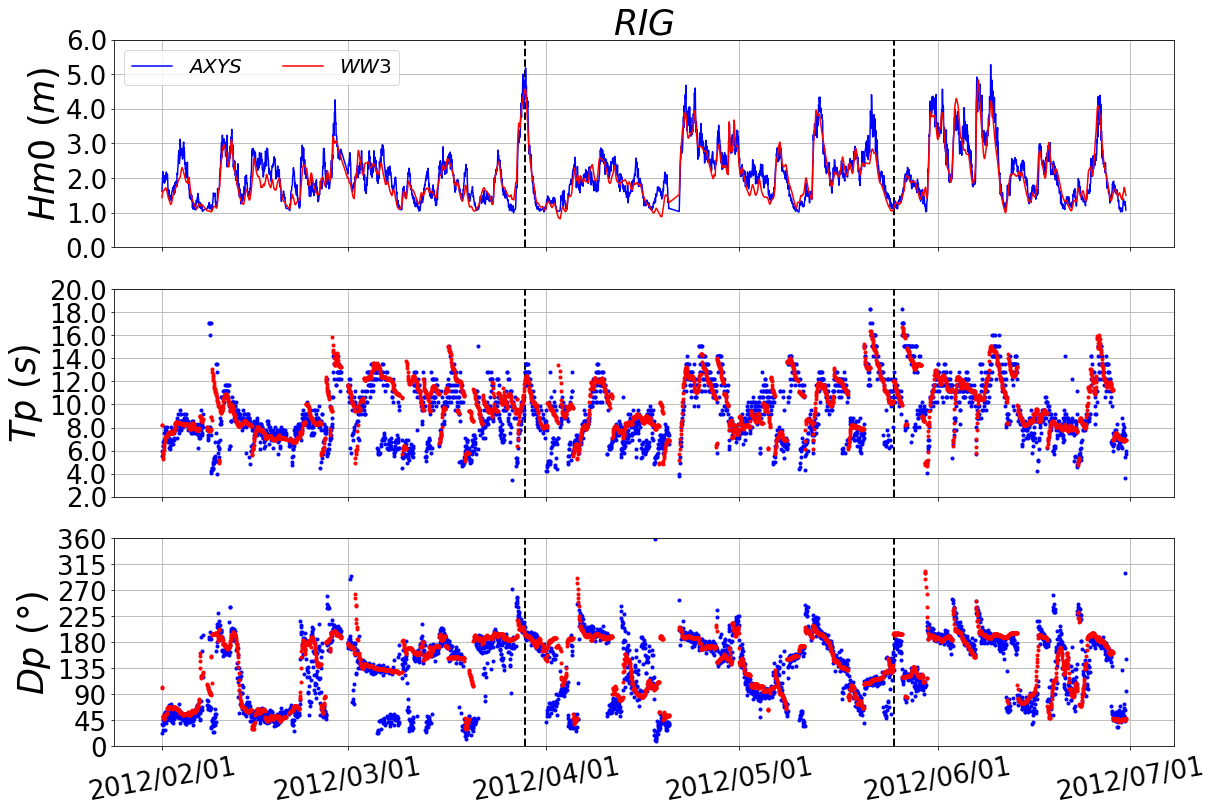

In [11]:
#grafico de series temporais boia x modelo

pl.close('all')
import  matplotlib
%matplotlib inline
# %matplotlib qt4

fs = 26
tl = 35

fw1 = '2012-03-28 14:00:00' #maior hs para hmax/hs>2
fw2 = '2012-05-25 06:00:00' #maior hmax/hs

fig = pl.figure(figsize=(19,13))
ax1 = fig.add_subplot(311)
ax1.set_title(r'$RIG$',fontsize=tl)

ax1.plot([pd.to_datetime(fw1),pd.to_datetime(fw1)],[0,6],'k--', linewidth=2)
ax1.plot([pd.to_datetime(fw2),pd.to_datetime(fw2)],[0,6],'k--', linewidth=2)
p1 = ax1.plot(rig.index,rig.hm0,'b',rigm.index,rigm.hm0,'r')
ax1.legend(p1,[r'$AXYS$',r'$WW3$'],ncol=2,loc=0, fontsize=20)
ax1.grid()
ax1.set_ylim(0,6)
ax1.set_ylabel(r'$Hm0\ (m)$',fontsize=tl)
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=fs)
# ax1.set_xlim('2012-03','2012-04')

ax2 = fig.add_subplot(312)
ax2.plot([pd.to_datetime(fw1),pd.to_datetime(fw1)],[2,20],'k--', linewidth=2)
ax2.plot([pd.to_datetime(fw2),pd.to_datetime(fw2)],[2,20],'k--', linewidth=2)
ax2.plot(rig.index,rig.tp,'.b',rigm.index,rigm.tp,'.r')
ax2.grid()
ax2.set_ylim(2,20)
#pl.xticks(visible=False)
ax2.set_ylabel(r'$Tp\ (s)$',fontsize=tl)
ax2.set_xticklabels(ax2.get_xticklabels(), visible=False)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=fs)
# ax2.set_xlim('2012-03','2012-04')

ax3 = fig.add_subplot(313)
ax3.plot([pd.to_datetime(fw1),pd.to_datetime(fw1)],[0,360],'k--', linewidth=2)
ax3.plot([pd.to_datetime(fw2),pd.to_datetime(fw2)],[0,360],'k--', linewidth=2)
ax3.plot(rig.index,rig.dp,'.b',rigm.index,rigm.dp,'.r')
ax3.grid()
ax3.set_ylim(0,360)
ax3.set_yticks(np.arange(0,360+45,45))
ax3.set_ylabel(r'$Dp\ ($' + u'\u00b0' + r'$)$',fontsize=tl)
ax3.set_yticklabels(np.arange(0,360+45,45), fontsize=fs)
ax3.set_xticklabels(ax3.get_xticks(), fontsize=fs, rotation=10)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
# ax3.set_xlim('2012-03','2012-04')

pl.show()

# fig.savefig('../fig/ww3buoy.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig.savefig('../doc/rev03/latex/fig/ww3buoy.jpg', format='jpeg', bbox_inches='tight')
fig.savefig(pathname_fig + 'ww3buoy.eps', format='eps',dpi=1200, bbox_inches='tight')


# Cross correlation between model and data for hs, tp and dp

In [12]:
from matplotlib.pyplot import xcorr

# cross correlation

ini_rig = '2012-03-28 00:00'
fim_rig = '2012-03-30 00:00'

ini_fln = '2012-03-28 12:00'
fim_fln = '2012-03-30 12:00'

ini_san = '2012-03-29 00:00'
fim_san = '2012-03-31 00:00'


#rig =================================================================

lags_rig_hm0, c_rig_hm0, line, b = xcorr(rig[ini_rig:fim_rig].hm0.values,
                                         rigm[ini_rig:fim_rig].hm0.values,
                                         hold=True,
                                         normed=True,
                                         usevlines=True,
                                         maxlags=20,
                                         detrend=mlab.detrend)

lags_rig_tp, c_rig_tp, line, b = xcorr(rig[ini_rig:fim_rig].tp.values,
                                       rigm[ini_rig:fim_rig].tp.values,
                                       hold=True,
                                       normed=True,
                                       usevlines=True,
                                       maxlags=20,
                                       detrend=mlab.detrend)

lags_rig_dp, c_rig_dp, line, b = xcorr(rig[ini_rig:fim_rig].dp.values,
                                       rigm[ini_rig:fim_rig].dp.values,
                                       hold=True,
                                       normed=True,
                                       usevlines=True,
                                       maxlags=20,
                                       detrend=mlab.detrend)

pl.close('all')
lag_rig_hm0 = lags_rig_hm0[pl.find(c_rig_hm0 == max(c_rig_hm0))][0]
lag_rig_tp  = lags_rig_tp[pl.find(c_rig_tp == max(c_rig_tp))][0]
lag_rig_dp  = lags_rig_dp[pl.find(c_rig_dp == max(c_rig_dp))][0]
print (lag_rig_hm0, lag_rig_tp, lag_rig_dp)


#fln =================================================================

lags_fln_hm0, c_fln_hm0, line, b = xcorr(fln[ini_fln:fim_fln].hm0.values,
                                         flnm[ini_fln:fim_fln].hm0.values,
                                         hold=True,
                                         normed=True,
                                         usevlines=True,
                                         maxlags=20,
                                         detrend=mlab.detrend)

lags_fln_tp, c_fln_tp, line, b = xcorr(fln[ini_fln:fim_fln].tp.values,
                                       flnm[ini_fln:fim_fln].tp.values,
                                       hold=True,
                                       normed=True,
                                       usevlines=True,
                                       maxlags=20,
                                       detrend=mlab.detrend)

lags_fln_dp, c_fln_dp, line, b = xcorr(fln[ini_fln:fim_fln].dp.values,
                                       flnm[ini_fln:fim_fln].dp.values,
                                       hold=True,
                                       normed=True,
                                       usevlines=True,
                                       maxlags=20,
                                       detrend=mlab.detrend)

pl.close('all')
lag_fln_hm0 = lags_fln_hm0[pl.find(c_fln_hm0 == max(c_fln_hm0))][0]
lag_fln_tp  = lags_fln_tp[pl.find(c_fln_tp == max(c_fln_tp))][0]
lag_fln_dp  = lags_fln_dp[pl.find(c_fln_dp == max(c_fln_dp))][0]
print (lag_fln_hm0, lag_fln_tp, lag_fln_dp)

#san =================================================================

lags_san_hm0, c_san_hm0, line, b = xcorr(sanm[ini_san:fim_san].hm0.values,
                                         sanm[ini_san:fim_san].hm0.values,
                                         hold=True,
                                         normed=True,
                                         usevlines=True,
                                         maxlags=20,
                                         detrend=mlab.detrend)

lags_san_tp, c_san_tp, line, b = xcorr(san[ini_san:fim_san].tp.values,
                                       sanm[ini_san:fim_san].tp.values,
                                       hold=True,
                                       normed=True,
                                       usevlines=True,
                                       maxlags=20,
                                       detrend=mlab.detrend)


lags_san_dp, c_san_dp, line, b = xcorr(san[ini_san:fim_san].dp.values,
                                       sanm[ini_san:fim_san].dp.values,
                                       hold=True,
                                       normed=True,
                                       usevlines=True,
                                       maxlags=20,
                                       detrend=mlab.detrend)

pl.close('all')
lag_san_hm0 = lags_san_hm0[pl.find(c_san_hm0 == max(c_san_hm0))][0]
lag_san_tp  = lags_san_tp[pl.find(c_san_tp == max(c_san_tp))][0]
lag_san_dp  = lags_san_dp[pl.find(c_san_dp == max(c_san_dp))][0]
print (lag_san_hm0, lag_san_tp, lag_san_dp)


/usr/local/python/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3748: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


0 0 0
0 1 -2
0 0 -6


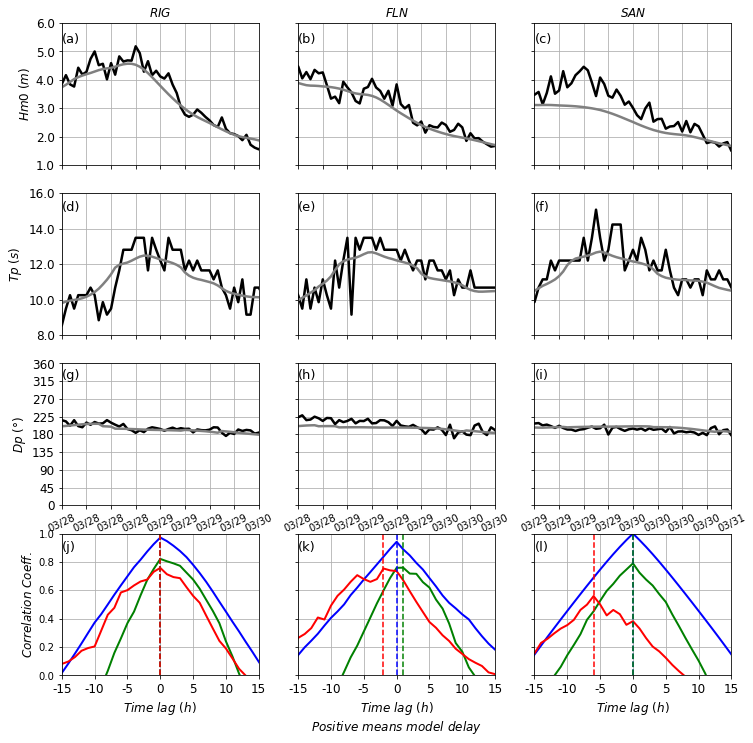

In [13]:
# swell arriving - RIG
# %matplotlib notebook

%matplotlib inline


from scipy.signal import correlate

fs = 12 #font size label
tl = 12 #font size title

pl.close('all')

fig = pl.figure(figsize=(12,12))

ax1 = fig.add_subplot(431)
ax1.set_title(r'$RIG$',fontsize=tl)
ax1.plot(rig.index,rig.hm0, linestyle='-', linewidth=2.5, color='black')
ax1.plot(rigm.index,rigm.hm0, linestyle='-', linewidth=2.5, color='gray')
ax1.grid()
ax1.set_xlim(ini_rig, fim_rig)
ax1.set_ylim(1,6)
ax1.set_ylabel(r'$Hm0\ (m)$',fontsize=tl)
ax1.set_xticklabels(ax1.get_xticklabels(), visible=True)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=fs)
ax1.text(ini_rig,5.3,'(a)', fontsize=13)

ax2 = fig.add_subplot(432)
ax2.set_title(r'$FLN$',fontsize=tl)
ax2.plot(fln.index,fln.hm0, linestyle='-', linewidth=2.5, color='black')
ax2.plot(flnm.index,flnm.hm0, linestyle='-', linewidth=2.5, color='gray')
#ax2.plot(fln.index,fln.hm0,'b.',flnm.index,flnm.hm0,'r.',  markersize=6)
ax2.grid()
ax2.set_xlim(ini_fln, fim_fln)
ax2.set_ylim(1,6)
ax2.set_xticklabels(ax2.get_xticklabels(), visible=True)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=fs, visible=False)
ax2.text(ini_fln,5.3,'(b)', fontsize=13)

ax3 = fig.add_subplot(433)
ax3.set_title(r'$SAN$',fontsize=tl)
ax3.plot(san.index,san.hm0, linestyle='-', linewidth=2.5, color='black')
ax3.plot(sanm.index,sanm.hm0, linestyle='-', linewidth=2.5, color='gray')
#ax3.plot(san.index,san.hm0,'b.',sanm.index,sanm.hm0,'r.',  markersize=6)
ax3.grid()
ax3.set_xlim(ini_san, fim_san)
ax3.set_ylim(1,6)
ax3.set_xticklabels(ax3.get_xticklabels(), visible=True)
ax3.set_yticklabels(ax3.get_yticks(), fontsize=fs, visible=False)
ax3.text(ini_san,5.3,'(c)', fontsize=13)

ax4 = fig.add_subplot(434)
ax4.plot(rig.index,rig.tp, linestyle='-', linewidth=2.5, color='black')
ax4.plot(rigm.index,rigm.tp, linestyle='-', linewidth=2.5, color='gray')
#ax4.plot(rig.index,rig.tp,'b.',rigm.index,rigm.tp,'r.',  markersize=6)
ax4.grid()
ax4.set_xlim(ini_rig, fim_rig)
ax4.set_ylim(8,16)
ax4.set_ylabel(r'$Tp\ (s)$',fontsize=tl)
ax4.set_xticklabels(ax4.get_xticklabels(), visible=False)
ax4.set_yticklabels(ax4.get_yticks(), fontsize=fs, visible=True)
ax4.text(ini_rig,15,'(d)', fontsize=13)

ax5 = fig.add_subplot(435)
ax5.plot(fln.index,fln.tp, linestyle='-', linewidth=2.5, color='black')
ax5.plot(flnm.index,flnm.tp, linestyle='-', linewidth=2.5, color='gray')
#ax5.plot(fln.index,fln.tp,'b.',flnm.index,flnm.tp,'r.',  markersize=6)
ax5.grid()
ax5.set_xlim(ini_fln, fim_fln)
ax5.set_ylim(8,16)
ax5.set_xticklabels(ax5.get_xticklabels(), visible=False)
ax5.set_yticklabels(ax5.get_yticks(), fontsize=fs, visible=False)
ax5.text(ini_fln,15,'(e)', fontsize=13)

ax6 = fig.add_subplot(436)
ax6.plot(san.index,san.tp, linestyle='-', linewidth=2.5, color='black')
ax6.plot(sanm.index,sanm.tp, linestyle='-', linewidth=2.5, color='gray')
#ax6.plot(san.index,san.tp,'b.',sanm.index,sanm.tp,'r.',  markersize=6)
ax6.grid()
ax6.set_xlim(ini_san, fim_san)
ax6.set_ylim(8,16)
ax6.set_xticklabels(ax6.get_xticklabels(), visible=False)
ax6.set_yticklabels(ax6.get_yticks(), fontsize=fs, visible=False)
ax6.text(ini_san,15,'(f)', fontsize=13)

ax7 = fig.add_subplot(437)
ax7.plot(rig.index,rig.dp, linestyle='-', linewidth=2.5, color='black')
ax7.plot(rigm.index,rigm.dp, linestyle='-', linewidth=2.5, color='gray')
#ax7.plot(rig.index,rig.dp,'b.',rigm.index,rigm.dp,'r.',  markersize=6)
ax7.grid()
ax7.set_xlim(ini_rig, fim_rig)
ax7.set_ylim(0,360)
ax7.set_yticks(np.arange(0,360+45,45))
ax7.set_ylabel(r'$Dp\ ($' + u'\u00b0' + r'$)$',fontsize=tl)
ax7.set_yticklabels(np.arange(0,360+45,45), fontsize=fs)
ax7.set_xticklabels(ax3.get_xticks(), fontsize=10, rotation=25)
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax7.text(ini_rig,320,'(g)', fontsize=13)

ax8 = fig.add_subplot(438)
ax8.plot(fln.index,fln.dp, linestyle='-', linewidth=2.5, color='black')
ax8.plot(flnm.index,flnm.dp, linestyle='-', linewidth=2.5, color='gray')
#ax8.plot(fln.index,fln.dp,'b.',flnm.index,flnm.dp,'r.',  markersize=6)
ax8.grid()
ax8.set_xlim(ini_fln, fim_fln)
ax8.set_ylim(0,360)
ax8.set_yticks(np.arange(0,360+45,45))
ax8.set_yticklabels(ax8.get_yticks(), fontsize=fs, visible=False)
ax8.set_xticklabels(ax8.get_xticks(), fontsize=10, rotation=25)
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax8.text(ini_fln,320,'(h)', fontsize=13)

ax9 = fig.add_subplot(439)
ax9.plot(san.index,san.dp, linestyle='-', linewidth=2.5, color='black')
ax9.plot(sanm.index,sanm.dp, linestyle='-', linewidth=2.5, color='gray')
#ax9.plot(san.index,san.dp,'b.',sanm.index,sanm.dp,'r.',  markersize=6)
ax9.grid()
ax9.set_xlim(ini_san, fim_san)
ax9.set_ylim(0,360)
ax9.set_yticks(np.arange(0,360+45,45))
ax9.set_yticklabels(ax9.get_yticks(), fontsize=fs, visible=False)
ax9.set_xticklabels(ax9.get_xticks(), fontsize=10, rotation=25)
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax9.text(ini_san,320,'(i)', fontsize=13)

ax10 = fig.add_subplot(4,3,10)
ax10.plot(lags_rig_hm0, c_rig_hm0,'b-',
          lags_rig_tp, c_rig_tp,'g-',
          lags_rig_dp, c_rig_dp,'r-',
          linewidth=2)
ax10.plot([lag_rig_hm0,lag_rig_hm0],[0,1],'b--',
          [lag_rig_tp,lag_rig_tp],[0,1],'g--',
          [lag_rig_dp,lag_rig_dp],[0,1],'r--')
ax10.grid()
ax10.set_ylim(0,1)
ax10.set_xlim(-15,15)
ax10.set_ylabel(r'$Correlation\ Coeff.$', fontsize=tl)
ax10.set_xlabel(r'$Time\ lag\ (h)$', fontsize=fs)
ax10.text(-15,0.88,'(j)', fontsize=13)
ax10.set_xticklabels(ax10.get_xticks().astype(int), fontsize=fs, rotation=0)

ax11 = fig.add_subplot(4,3,11)
ax11.plot(lags_fln_hm0, c_fln_hm0,'b-',
          lags_fln_tp, c_fln_tp,'g-',
          lags_fln_dp, c_fln_dp,'r-',
          linewidth=2)
ax11.plot([lag_fln_hm0,lag_fln_hm0],[0,1],'b--',
          [lag_fln_tp,lag_fln_tp],[0,1],'g--',
          [lag_fln_dp,lag_fln_dp],[0,1],'r--')
ax11.grid()
ax11.set_ylim(0,1)
ax11.set_xlim(-15,15)
ax11.set_xlabel(r'$Time\ lag\ (h)$' + '\n' + r'$Positive\ means\ model\ delay$', fontsize=fs)
ax11.text(-15,0.88,'(k)', fontsize=13)
ax11.set_yticklabels(ax11.get_yticks(), fontsize=fs, visible=False)
ax11.set_xticklabels(ax11.get_xticks().astype(int), fontsize=fs, rotation=0)

ax12 = fig.add_subplot(4,3,12)
ax12.plot(lags_san_hm0, c_san_hm0,'b-',
          lags_san_tp, c_san_tp,'g-',
          lags_san_dp, c_san_dp,'r-',
          linewidth=2)
ax12.plot([lag_san_hm0,lag_san_hm0],[0,1],'b--',
          [lag_san_tp,lag_san_tp],[0,1],'g--',
          [lag_san_dp,lag_san_dp],[0,1],'r--')
ax12.grid()
ax12.set_ylim(0,1)
ax12.set_xlim(-15,15)
ax12.set_xlabel(r'$Time\ lag\ (h)$', fontsize=fs)
ax12.text(-15,0.88,'(l)', fontsize=13)
ax12.set_yticklabels(ax12.get_yticks(), fontsize=fs, visible=False)
ax12.set_xticklabels(ax12.get_xticks().astype(int), fontsize=fs, rotation=0)

pl.show()

# fig.savefig('../fig/swell_arival_corr.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig.savefig('../doc/rev03/latex/fig/swell_arival_corr.jpg', format='jpeg', bbox_inches='tight')
fig.savefig(pathname_fig + 'swell_arival_corr.eps', format='eps', dpi=1200, bbox_inches='tight')

1.13679443697e-06 2.68349132335
8.92126320154e-06 125.657946137
dp        175.425845
h10         1.409474
hm0         1.194342
hmax        2.590000
hs          1.076190
thmax       7.020000
tmed        6.536150
tp         12.812500
tzamax     13.260000
rfw         2.406637
Name: 2012-05-25 06:00:00, dtype: float64

dp        199.799990
h10         5.480667
hm0         4.826005
hmax        9.300000
hs          4.348298
thmax       9.360000
tmed        8.435143
tp         11.647727
tzamax     15.600000
rfw         2.138768
Name: 2012-03-28 14:00:00, dtype: float64

Rio Grande 
 Num arq: 3469 ; Num FW: 100 ; Porc FW: 2.88
Floripa 
 Num arq: 3463 ; Num FW: 109 ; Porc FW: 3.15
Santos 
 Num arq: 3377 ; Num FW: 116 ; Porc FW: 3.44


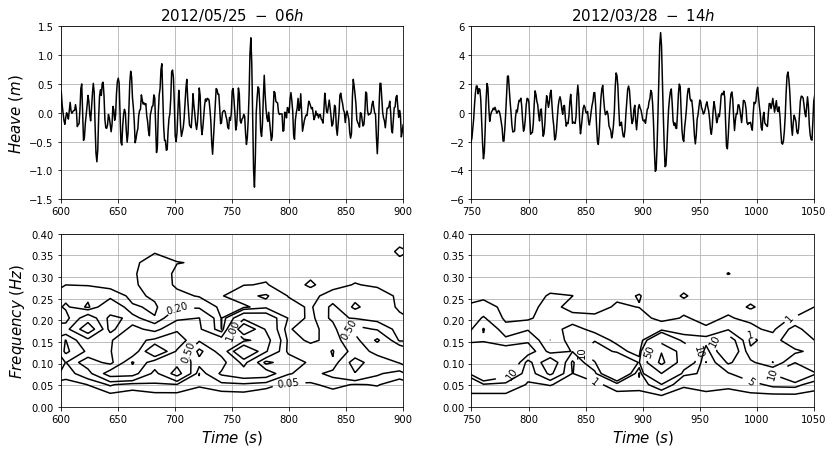

In [61]:
#freak-wave e espectrograma

pathname = os.environ['HOME'] + '/Dropbox/database/PNBOIA/rio_grande/HNE/'

s1 = pd.read_table(pathname + '201205250600.HNE',skiprows=11,sep='\s+',names=['time','n1','n2','n3'])
s2 = pd.read_table(pathname + '201203281400.HNE',skiprows=11,sep='\s+',names=['time','n1','n2','n3'])

dt = 0.78
t = np.arange(0,len(s1)*dt,dt)
nfft = 50    # the length of the windowing segments
Fs = 1 / dt  # the sampling frequency

spectrum1, freqs1, t1 = mlab.specgram(s1.n1, NFFT=nfft, Fs=Fs,detrend=mlab.detrend_none,
        window=mlab.window_hanning, noverlap=nfft/2)

spectrum2, freqs2, t2 = mlab.specgram(s2.n1, NFFT=nfft, Fs=Fs,detrend=mlab.detrend_none,
        window=mlab.window_hanning, noverlap=nfft/2)

# alisamento
spectrum1 = gaussian_filter(spectrum1, sigma=0.3, order=0)
spectrum2 = gaussian_filter(spectrum2, sigma=0.3, order=0)

print (spectrum1.min(), spectrum1.max())
print (spectrum2.min(), spectrum2.max())

#spectrograma
plt.figure(figsize=(13.5,7))

plt.subplot(221)
plt.plot(t,s1.n1,'k')
plt.title(r'$2012/05/25\ -\ 06h$',fontsize=15)
plt.xlim(600,900)
plt.ylim(-1.5,1.5)
plt.ylabel(r'$Heave\ (m)$',fontsize=15)
plt.grid()
plt.subplot(223)
CS1 = plt.contour(t1,freqs1,spectrum1,shading='flat',colors='k',levels=[0.05,0.2,0.5,1.0,1.4])
# manual_locations = [(650, 0.35)]
plt.clabel(CS1, inline=1, inline_spacing=-7, fontsize=10, fmt='%.2f')#, manual=manual_locations)
plt.ylim(0,0.4)
plt.xlim(600,900)
plt.grid()
plt.ylabel(r'$Frequency\ (Hz)$',fontsize=15)
plt.xlabel(r'$Time\ (s)$',fontsize=15)

plt.subplot(222)
plt.plot(t,s2.n1,'k')
plt.title(r'$2012/03/28\ -\ 14h$',fontsize=15)
plt.xlim(750,1050)
plt.ylim(-6,6)
plt.grid()
plt.subplot(224)
CS2 = plt.contour(t2,freqs2,spectrum2,shading='flat',colors='k',levels=[1,5,10,50,110])
# manual_locations = [(650, 0.35)]
plt.clabel(CS2, inline=1, inline_spacing=0, fontsize=10, fmt='%i')#, manual=manual_locations)
plt.ylim(0,0.4)
plt.xlim(750,1050)
plt.grid()
plt.xlabel(r'$Time\ (s)$',fontsize=15)

print (rig.ix['2012-05-25 06'])
print ('')
print (rig.ix['2012-03-28 14'])
print ('')

#rio grande
a = rig.ix[pl.find( (rig.hmax / rig.hs).isnull() == False)]
nfw = pl.find(rig.hmax / rig.hs > 2).shape[0]
print ('Rio Grande \n Num arq: %.i ; Num FW: %.i ; Porc FW: %.2f' %(len(a), nfw, (nfw * 100.0) / len(a)))

#florianopolis
a = fln.ix[pl.find( (fln.hmax / fln.hs).isnull() == False)]
nfw = pl.find(fln.hmax / fln.hs > 2).shape[0]
print ('Floripa \n Num arq: %.i ; Num FW: %.i ; Porc FW: %.2f' %(len(a), nfw, (nfw * 100.0) / len(a)))

#santos
a = san.ix[pl.find( (san.hmax / san.hs).isnull() == False)]
nfw = pl.find(san.hmax / san.hs > 2).shape[0]
print ('Santos \n Num arq: %.i ; Num FW: %.i ; Porc FW: %.2f' %(len(a), nfw, (nfw * 100.0) / len(a)))

# plt.savefig('../fig/spectrogram_freakwave.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# plt.savefig('../doc/rev03/latex/fig/spectrogram_freakwave.jpg', format='jpeg', bbox_inches='tight')
plt.savefig(pathname_fig + 'spectrogram_freakwave.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.savefig(pathname_fig + 'spectrogram_freakwave.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [55]:
spectrum1[:,1:10].shape

(26, 9)

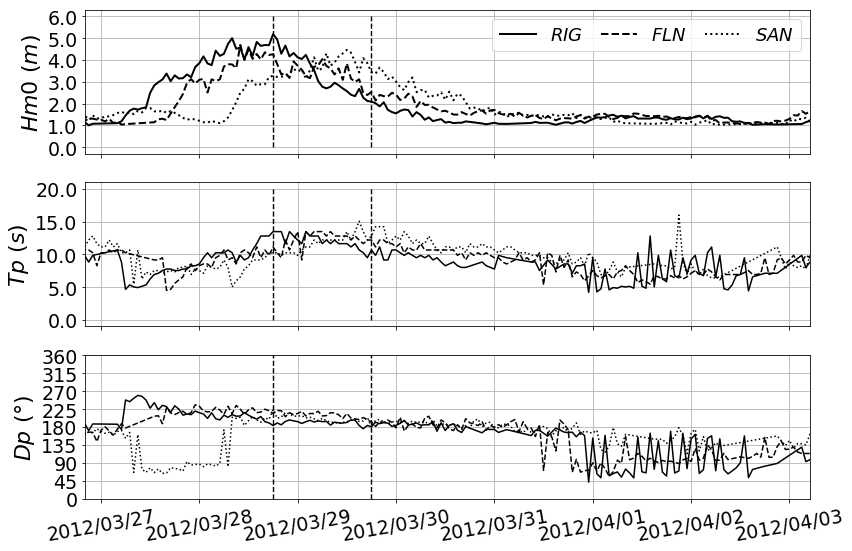

In [16]:
#evolucao rig, fln e san

#inicio e fim para plotagem da evolserie
ini = 1250
fim = 1400

#tamanho da fonte
fonts = 22

#evolucao serie
fig = pl.figure(figsize=(13,9))
ax1 = fig.add_subplot(311)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d \n %H:%M'))
ax1.plot(rig.index,rig.hm0,'k-',fln.index,fln.hm0,'k--',san.index,san.hm0,'k:', linewidth=2)
ax1.plot([rig.loc['2012-03-28 18:00:00'].name,rig.loc['2012-03-28 18:00:00'].name],[0,6],'k--',linewidth=1.4)
ax1.legend([r'$RIG$',r'$FLN$',r'$SAN$'], labelspacing=None, columnspacing=1, fontsize=fonts-4, ncol=3)
ax1.plot([rig.loc['2012-03-29 18:00:00'].name,rig.loc['2012-03-29 18:00:00'].name],[0,6],'k--',linewidth=1.4)
ax1.set_xlim(rig.index[ini],rig.index[fim])
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.grid()

ax1.set_yticklabels(ax1.get_yticks(), fontsize=fonts-3)

ax1.set_ylabel(r'$Hm0\ (m)$',fontsize=fonts)
ax2 = fig.add_subplot(312)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d \n %H:%M'))
ax2.plot(rig.index,rig.tp,'k-',fln.index,fln.tp,'k--',san.index,san.tp,'k:')
ax2.plot([rig.loc['2012-03-28 18:00:00'].name,rig.loc['2012-03-28 18:00:00'].name],[0,20],'k--',linewidth=1.4)
ax2.plot([rig.loc['2012-03-29 18:00:00'].name,rig.loc['2012-03-29 18:00:00'].name],[0,20],'k--',linewidth=1.4)
ax2.grid()

ax2.set_yticklabels(ax2.get_yticks(), fontsize=fonts-3)

ax2.set_xticklabels(ax2.get_xticklabels(), visible=False)
ax2.set_xlim(rig.index[ini],rig.index[fim])
ax2.set_ylabel(r'$Tp\ (s)$',fontsize=fonts)

ax3 = fig.add_subplot(313)
ax3.plot(rig.index,rig.dp,'k-',fln.index,fln.dp,'k--',san.index,san.dp,'k:')
ax3.plot([rig.loc['2012-03-28 18:00:00'].name,rig.loc['2012-03-28 18:00:00'].name],[0,360],'k--',linewidth=1.4)
ax3.plot([rig.loc['2012-03-29 18:00:00'].name,rig.loc['2012-03-29 18:00:00'].name],[0,360],'k--',linewidth=1.4)
ax3.grid()
ax3.set_yticklabels(np.arange(0,360+45,45), fontsize=fonts-3)

ax3.set_xlim(rig.index[ini],rig.index[fim])
ax3.set_yticks(np.arange(0,360+45,45))
ax3.set_ylim(0,360)
ax3.set_ylabel(r'$Dp\ $' + u'(\u00b0)',fontsize=fonts)
ax3.set_xticklabels(ax3.get_xticks(), fontsize=fonts-3, rotation=10)
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))

# fig.savefig('../fig/evolserie.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# plt.savefig('../doc/rev03/latex/fig/evolserie.jpg', format='jpeg', bbox_inches='tight')
fig.savefig(pathname_fig + 'evolserie.eps', format='eps', dpi=1200, bbox_inches='tight')

In [27]:
#evolucao espectral

pathname1 = os.environ['HOME'] + '/Dropbox/database/PNBOIA/'
    
nfft = 328
fs = 1.28
h = 200

data1 = '201203281800.HNE' #hs chegou no maximo em rio grande
data2 = '201203291800.HNE' #24 horas depois

rig1 = pd.read_table(pathname1 + 'rio_grande/HNE/' + data1,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])
fln1 = pd.read_table(pathname1 + 'florianopolis/HNE/' + data1,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])
san1 = pd.read_table(pathname1 + 'santos/HNE/' + data1,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])

rig2 = pd.read_table(pathname1 + 'rio_grande/HNE/' + data2,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])
fln2 = pd.read_table(pathname1 + 'florianopolis/HNE/' + data2,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])
san2 = pd.read_table(pathname1 + 'santos/HNE/' + data2,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])

#calcula parametros de ondas

#rio grande 1
hm0_rig1, tp_rig1, dp_rig1, sigma1, sigma2, sigma1p, sigma2p, freq, df, k, sn_rig1, snx,sny, snn, snnx, snny, snxny, snxnx, snyny, a1, b1, a2, b2, dire1_rig1, dire2 = proconda.ondaf(
rig1.eta,rig1.etax,rig1.etay,h,nfft,fs)
dmag_rig = -17

#corrige a declinacao magnetica
dp_rig1 = dp_rig1 + dmag_rig
if dp_rig1 < 0:
    dp_rig1 = dp_rig1 + 360
dire1_rig1 = dire1_rig1 + dmag_rig
dire1_rig1[pl.find(dire1_rig1<0)] = dire1_rig1[pl.find(dire1_rig1<0)] + 360

#rio grande 2
hm0_rig2, tp_rig2, dp_rig2, sigma1, sigma2, sigma1p, sigma2p, freq, df, k, sn_rig2, snx,sny, snn, snnx, snny, snxny, snxnx, snyny, a1, b1, a2, b2, dire1_rig2, dire2 = proconda.ondaf(
rig2.eta,rig2.etax,rig2.etay,h,nfft,fs)

#corrige a declinacao magnetica
dp_rig2 = dp_rig2 + dmag_rig
if dp_rig2 < 0:
    dp_rig2 = dp_rig2 + 360
dire1_rig2 = dire1_rig2 + dmag_rig
dire1_rig2[pl.find(dire1_rig2<0)] = dire1_rig2[pl.find(dire1_rig2<0)] + 360

#florianopolis 1
hm0_fln1, tp_fln1, dp_fln1, sigma1, sigma2, sigma1p, sigma2p, freq, df, k, sn_fln1, snx,sny, snn, snnx, snny, snxny, snxnx, snyny, a1, b1, a2, b2, dire1_fln1, dire2 = proconda.ondaf(
fln1.eta,fln1.etax,fln1.etay,h,nfft,fs)
dmag_fln = -20

#corrige a declinacao magnetica
dp_fln1 = dp_fln1 + dmag_fln
if dp_fln1 < 0:
    dp_fln1 = dp_fln1 + 360
dire1_fln1 = dire1_fln1 + dmag_fln
dire1_fln1[pl.find(dire1_fln1<0)] = dire1_fln1[pl.find(dire1_fln1<0)] + 360

#florianopolis 2
hm0_fln2, tp_fln2, dp_fln2, sigma1, sigma2, sigma1p, sigma2p, freq, df, k, sn_fln2, snx,sny, snn, snnx, snny, snxny, snxnx, snyny, a1, b1, a2, b2, dire1_fln2, dire2 = proconda.ondaf(
fln2.eta,fln2.etax,fln2.etay,h,nfft,fs)

#corrige a declinacao magnetica
dp_fln2 = dp_fln2 + dmag_fln
if dp_fln2 < 0:
    dp_fln2 = dp_fln2 + 360
dire1_fln2 = dire1_fln2 + dmag_fln
dire1_fln2[pl.find(dire1_fln2<0)] = dire1_fln2[pl.find(dire1_fln2<0)] + 360

#santos 1
hm0_san1, tp_san1, dp_san1, sigma1, sigma2, sigma1p, sigma2p, freq, df, k, sn_san1, snx,sny, snn, snnx, snny, snxny, snxnx, snyny, a1, b1, a2, b2, dire1_san1, dire2 = proconda.ondaf(
san1.eta,san1.etax,san1.etay,h,nfft,fs)
dmag_san = -22

#corrige a declinacao magnetica
dp_san1 = dp_san1 + dmag_san
if dp_san1 < 0:
    dp_san1 = dp_san1 + 360
dire1_san1 = dire1_san1 + dmag_san
dire1_san1[pl.find(dire1_san1<0)] = dire1_san1[pl.find(dire1_san1<0)] + 360

#santos 2
hm0_san2, tp_san2, dp_san2, sigma1, sigma2, sigma1p, sigma2p, freq, df, k, sn_san2, snx,sny, snn, snnx, snny, snxny, snxnx, snyny, a1, b1, a2, b2, dire1_san2, dire2 = proconda.ondaf(
san2.eta,san2.etax,san2.etay,h,nfft,fs)

#corrige a declinacao magnetica
dp_san2 = dp_san2 + dmag_san
if dp_san2 < 0:
    dp_san2 = dp_san2 + 360
dire1_san2 = dire1_san2 + dmag_san
dire1_san2[pl.find(dire1_san2<0)] = dire1_san2[pl.find(dire1_san2<0)] + 360


#########################################################################
#########################################################################

fs = 17
fs1 = 15

fig = pl.figure(figsize=(13,10))
ax1 = fig.add_subplot(321)
ax1.plot(sn_rig1[:,0],sn_rig1[:,1],'k-',sn_fln1[:,0],sn_fln1[:,1],'k--',sn_san1[:,0],sn_san1[:,1],'k:',linewidth=1.4)
ax1.set_title(r'$2012-03-28\ 18h$',fontsize=fs)
ax1.legend([r'$Hm0=%.1f\ m;\ Tp=%.1f\ s;\ Dp=%.i\ $' %(round(hm0_rig1,1),round(tp_rig1,1),round(dp_rig1,0)) + u'\u00b0',
            r'$Hm0=%.1f\ m;\ Tp=%.1f\ s;\ Dp=%.i\ $' %(round(hm0_fln1,1),round(tp_fln1,1),round(dp_fln1,0)) + u'\u00b0',
            r'$Hm0=%.1f\ m;\ Tp=%.1f\ s;\ Dp=%.i\ $' %(round(hm0_san1,1),round(tp_san1,1),round(dp_san1,0)) + u'\u00b0'],
           fontsize=fs, bbox_to_anchor=(1.05,-1.6))
ax1.grid()
ax1.set_xlim(0.05,0.25)
ax1.set_ylim(0,50)
ax1.set_ylabel(r'$m^{2}/Hz$',fontsize=fs)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=fs, visible=True)
ax1.set_xticklabels(ax1.get_xticks(), fontsize=fs, visible=True)

ax2 = fig.add_subplot(322)
ax2.plot(sn_rig2[:,0],sn_rig2[:,1],'k-',sn_fln2[:,0],sn_fln2[:,1],'k--',sn_san2[:,0],sn_san2[:,1],'k:',linewidth=1.4)
ax2.set_title(r'$2012-03-29\ 18h$',fontsize=fs)
ax2.legend([r'$Hm0=%.1f\ m;\ Tp=%.1f\ s;\ Dp=%.i\ $' %(round(hm0_rig2,1),round(tp_rig2,1),round(dp_rig2,0)) + u'\u00b0',
            r'$Hm0=%.1f\ m;\ Tp=%.1f\ s;\ Dp=%.i\ $' %(round(hm0_fln2,1),round(tp_fln2,1),round(dp_fln2,0)) + u'\u00b0',
            r'$Hm0=%.1f\ m;\ Tp=%.1f\ s;\ Dp=%.i\ $' %(round(hm0_san2,1),round(tp_san2,1),round(dp_san2,0)) + u'\u00b0'],
           fontsize=fs, bbox_to_anchor=(1.05,-1.6))
ax2.set_xlim(0.05,0.25)
ax2.set_ylim(0,50)
ax2.grid()
ax2.set_yticklabels(ax2.get_yticks(), fontsize=fs, visible=True)
ax2.set_xticklabels(ax2.get_xticks(), fontsize=fs, visible=True)

ax3 = fig.add_subplot(323)
ax3.plot(sn_rig1[:,0],dire1_rig1,'k-',sn_fln1[:,0],dire1_fln1,'k--',sn_san1[:,0],dire1_san1,'k:',linewidth=1.4)
ax3.set_xlim(0.05,0.25)
ax3.set_yticks(np.arange(0,360+45,45))
ax3.set_ylim(0,360)
ax3.grid()
ax3.set_xlabel(r'$Frequency\ (Hz)$',fontsize=fs)
ax3.set_ylabel(r'$Mean\ Direction\ $' + u'(\u00b0)',fontsize=fs)
ax3.set_xticklabels(ax3.get_xticks(), fontsize=fs)
ax3.set_yticklabels(ax3.get_yticks(), fontsize=fs)

ax4 = fig.add_subplot(324)
ax4.plot(sn_rig2[:,0],dire1_rig2,'k-',sn_fln2[:,0],dire1_fln2,'k--',sn_san2[:,0],dire1_san2,'k:',linewidth=1.4)
ax4.set_xlim(0.05,0.25)
ax4.set_yticks(np.arange(0,360+45,45))
ax4.set_ylim(0,360)
ax4.grid()
ax4.set_xlabel(r'$Frequency\ (Hz)$',fontsize=fs)
ax4.set_xticklabels(ax4.get_xticks(), fontsize=fs)
ax4.set_yticklabels(ax4.get_yticks(), fontsize=fs)

# fig.savefig('../fig/evolspec.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig.savefig('../doc/rev03/latex/fig/evolspec.jpg', format='jpeg', bbox_inches='tight')
fig.savefig(pathname_fig + 'evolspec.eps', format='eps', dpi=1200, bbox_inches='tight')


FileNotFoundError: File b'/home/hp/Dropbox/database/PNBOIA/florianopolis/HNE/201203281800.HNE' does not exist

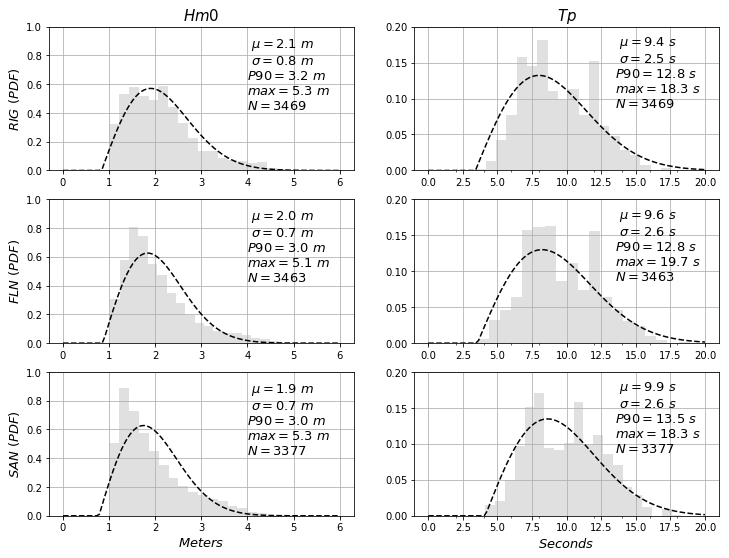

In [21]:
# histograma hs, tp e dp - rig, fln e san


def histogram(fig, ax, serie, tit, ylab, ylim, x, fsz, xt1, xt2, texp1,
texp2, unit, xlab=''):

  '''
  ax1 = axes for subplot
  serie = temporal serie
  tit = title
  x = xticks spaced limits
  fsz = fontsize
  xt = xticks
  ylab = ylabel
  '''
  ax.set_title(tit, fontsize=fsz)
  param = rayleigh.fit(serie.loc[serie.notnull()])
  pdf_fitted = rayleigh.pdf(x,loc=param[0],scale=param[1])
  ax.hist(serie[~np.isnan(serie)], bins=20, normed=1, alpha=.7, color='lightgrey')
  ax.plot(x,pdf_fitted,'k--',linewidth=1.5)
  ax.grid()
  ax.set_xticks(xt1, xt2)
  ax.set_ylabel(ylab, fontsize=13)
  ax.set_xlabel(xlab, fontsize=13)
  ax.set_ylim(ylim)
  ax.text(texp1, texp2,r'$\mathrm{}\ \mu=%.1f\ %s$' %(serie.mean(), unit) + '\n' +
                       r'$\mathrm{}\ \sigma=%.1f\ %s$' %(serie.std(), unit) + '\n' +
                       r'$P90=%.1f\ %s$' %(np.percentile(serie[~np.isnan(serie)], 90), unit) + '\n' +
                       r'$max=%.1f\ %s$' %(serie.max(), unit) + '\n' + 
                       r'$N=%i$' %(len(serie)),
                       fontsize=13)


fig1 = pl.figure(figsize=(12,9))

#Hm0 - RIG
histogram(
          fig=fig1,
          ax=fig1.add_subplot(321),
          serie=rig.hm0,
          tit=r'$Hm0$',
          ylab=r'$RIG\ (PDF)$',
          ylim=(0,1),
          x=np.linspace(0,6,100),
          fsz=15,
          xt1 = list(np.arange(7)),
          xt2 = list(np.arange(7).astype(str)),
          texp1 = 4,
          texp2 = 0.44,
          unit = 'm'
          )

#Tp - RIG
histogram(
          fig=fig1,
          ax=fig1.add_subplot(322),
          serie=rig.tp,
          tit=r'$Tp$',
          ylab='',
          ylim=(0,0.2),
          x=np.linspace(0,20,100),
          fsz=15,
          xt1 = list(np.arange(0,22,2)),
          xt2 = list(np.arange(0,22,2).astype(str)),
          texp1 = 13.5,
          texp2 = 0.09,
          unit = 's'
          )


#Hm0 - FLN
histogram(
          fig=fig1,
          ax=fig1.add_subplot(323),
          serie=fln.hm0,
          tit='',
          ylab=r'$FLN\ (PDF)$',
          ylim=(0,1),
          x=np.linspace(0,6,100),
          fsz=15,
          xt1 = list(np.arange(7)),
          xt2 = list(np.arange(7).astype(str)),
          texp1 = 4,
          texp2 = 0.44,
          unit = 'm'
          )

#Tp - FLN
histogram(
          fig=fig1,
          ax=fig1.add_subplot(324),
          serie=fln.tp,
          tit='',
          ylab='',
          ylim=(0,0.2),
          x=np.linspace(0,20,100),
          fsz=15,
          xt1 = list(np.arange(0,22,2)),
          xt2 = list(np.arange(0,22,2).astype(str)),
          texp1 = 13.5,
          texp2 = 0.09,
          unit = 's'
          )


#Hm0 - SAN
histogram(
          fig=fig1,
          ax=fig1.add_subplot(325),
          serie=san.hm0,
          tit='',
          ylab=r'$SAN\ (PDF)$',
          ylim=(0,1),
          x=np.linspace(0,6,100),
          fsz=15,
          xt1 = list(np.arange(7)),
          xt2 = list(np.arange(7).astype(str)),
          texp1 = 4,
          texp2 = 0.44,
          unit = 'm',
          xlab=r'$Meters$'
          )

#Tp - SAN
histogram(
          fig=fig1,
          ax=fig1.add_subplot(326),
          serie=san.tp,
          tit='',
          ylab='',
          ylim=(0,0.2),
          x=np.linspace(0,20,100),
          fsz=15,
          xt1 = list(np.arange(0,22,2)),
          xt2 = list(np.arange(0,22,2).astype(str)),
          texp1 = 13.5,
          texp2 = 0.09,
          unit = 's',
          xlab=r'$Seconds$'
          )

# fig1.savefig('../fig/histhstp.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig1.savefig('../doc/rev03/latex/fig/histhstp.jpg', format='jpeg', bbox_inches='tight')
fig1.savefig(pathname_fig + 'histhstp.eps', format='eps', dpi=1200, bbox_inches='tight')

/usr/local/python/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


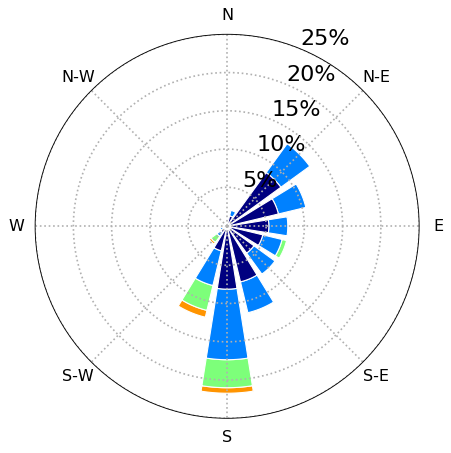

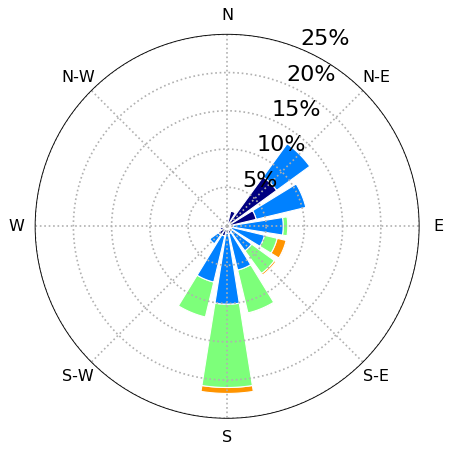

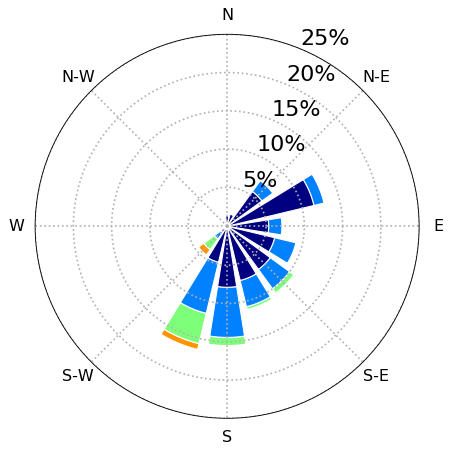

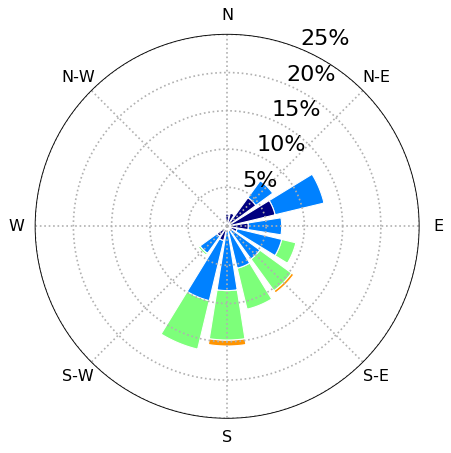

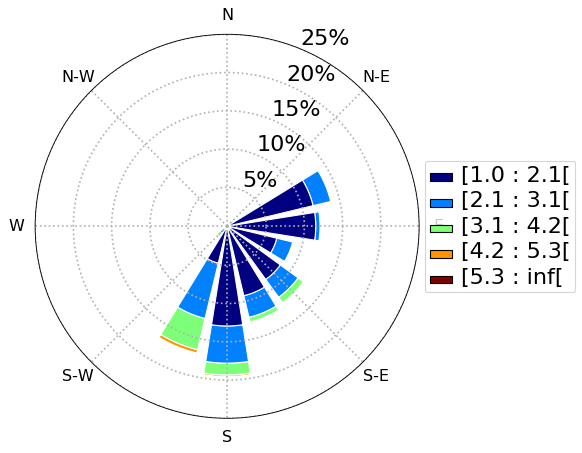

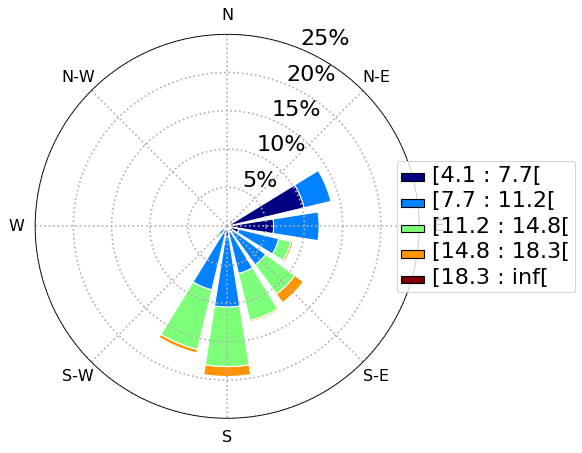

In [22]:
# wave rose


# define funcao para criar windrose

def waverose(inte, dire, figsz, nsector, radsize, xsize, leg, bbx):

    def new_axes():
        fig = plt.figure(figsize=figsz, dpi=80, frameon=False)
        rect = [0.1, 0.1, 0.6, 0.8]
        ax = WindroseAxes(fig, rect, axisbg='w')
        fig.add_axes(ax)
        return ax, fig

    ax, fig = new_axes()

    def set_legend(ax, bbx):
        l = ax.legend(loc="center right", borderaxespad=bbx)
        # l.get_frame().set_fill(False) #transparent legend
        plt.setp(l.get_texts(), fontsize=20, weight='normal')

    ax.bar(dire, inte, normed=True, bins=5, opening=0.8,
           edgecolor='white', nsector=nsector)
    ax.grid(True, linewidth=1.5, linestyle='dotted')

    ax.set_radii_angle(fontsize=radsize)
    ax.set_xticklabels(ax.theta_labels, fontsize=xsize)
    ax.set_radii_angle(fontsize=radsize)
    ax.set_xticklabels(ax.theta_labels, fontsize=xsize)

    if leg == 'on':
        set_legend(ax, bbx)

    return ax, fig


ax1, fig1 = waverose(inte=rig.hm0, dire=rig.dp, figsz=(8.5, 6),
                     nsector=16, radsize=20, xsize='x-large', leg='off', bbx=-10.8)

ax2, fig2 = waverose(inte=rig.tp, dire=rig.dp, figsz=(8.5, 6),
                     nsector=16, radsize=20, xsize='x-large', leg='off', bbx=-10.8)

ax3, fig3 = waverose(inte=fln.hm0, dire=fln.dp, figsz=(8.5, 6),
                     nsector=16, radsize=20, xsize='x-large', leg='off', bbx=-10.8)

ax4, fig4 = waverose(inte=fln.tp, dire=fln.dp, figsz=(8.5, 6),
                     nsector=16, radsize=20, xsize='x-large', leg='off', bbx=-10.8)

ax5, fig5 = waverose(inte=san.hm0, dire=san.dp, figsz=(8.5, 6),
                     nsector=16, radsize=20, xsize='x-large', leg='on', bbx=-14)

ax6, fig6 = waverose(inte=san.tp, dire=san.dp, figsz=(8.5, 6),
                     nsector=16, radsize=20, xsize='x-large', leg='on', bbx=-14)

fig1.savefig('../fig/RIG_WR_HsDp.eps', dpi=1200, facecolor='w', edgecolor='w', orientation='portrait', format='eps', transparent=True, pad_inches=0.1, bbox_inches='tight')
fig2.savefig('../fig/RIG_WR_TpDp.eps', dpi=1200, facecolor='w', edgecolor='w', orientation='portrait', format='eps', transparent=True, pad_inches=0.1, bbox_inches='tight')
fig3.savefig('../fig/FLN_WR_HsDp.eps', dpi=1200, facecolor='w', edgecolor='w', orientation='portrait', format='eps', transparent=True, pad_inches=0.1, bbox_inches='tight')
fig4.savefig('../fig/FLN_WR_TpDp.eps', dpi=1200, facecolor='w', edgecolor='w', orientation='portrait', format='eps', transparent=True, pad_inches=0.1, bbox_inches='tight')
fig5.savefig('../fig/SAN_WR_HsDp.eps', dpi=1200, facecolor='w', edgecolor='w', orientation='portrait', format='eps', transparent=True, pad_inches=0.1, bbox_inches='tight')
fig6.savefig('../fig/SAN_WR_TpDp.eps', dpi=1200, facecolor='w', edgecolor='w', orientation='portrait', format='eps', transparent=True, pad_inches=0.1, bbox_inches='tight')

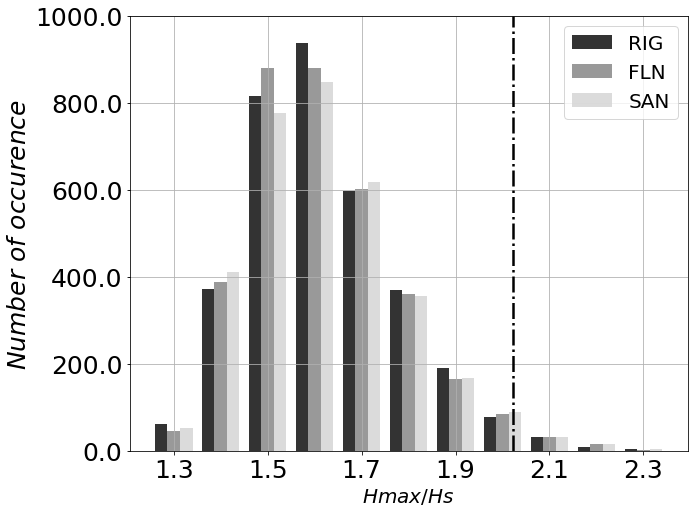

In [23]:
#histograma relacao freak-waves

#indices dos valores se nan
indrig = pl.find(np.isnan(rig.hs)==False)
indfln = pl.find(np.isnan(fln.hs)==False)
indsan = pl.find(np.isnan(san.hs)==False)


#valores da relacao de freakwaves
rig['rfw'] = rig.hmax/rig.hs
fln['rfw'] = fln.hmax/fln.hs
san['rfw'] = san.hmax/san.hs

#indices das relacoes maiores que 2.0
irfw_rig = pl.find(rig.rfw > 2.0)
irfw_fln = pl.find(fln.rfw > 2.0)
irfw_san = pl.find(san.rfw > 2.0)


#indice do maior valor da relacao de freakwaves
#2012-03-22 04:00:00
imax_rfw_rig = pl.find(rig.rfw == max(rig.rfw[irfw_rig]))
imax_hs_rig = pl.find(rig.hs == max(rig.hs[irfw_rig]))

imax_rfw_fln = pl.find(fln.rfw == max(fln.rfw[irfw_fln]))
imax_hs_fln = pl.find(fln.hs == max(fln.hs[irfw_fln]))

imax_rfw_san = pl.find(san.rfw == max(san.rfw[irfw_san]))
imax_hs_san = pl.find(san.hs == max(san.hs[irfw_san]))

fs = 25

colors = ['k','red','red']
bins = np.linspace(rig.rfw.min(),rig.rfw.max(),5)
bins = np.arange(rig.rfw.min(),rig.rfw.max(),0.1)
fig, ax = pl.subplots(figsize=(10,8))
ax.hist([rig.rfw[indrig], fln.rfw[indfln], san.rfw[indsan]], bins=bins, normed=0, color=['black','grey','lightgrey'], alpha=0.8, align=u'left', label=['RIG','FLN','SAN'])
ax.set_xticks(bins[:-1][::2])
xx = ax.get_xticks() #ajusta o axis
ll = ['%.1f' % a for a in xx]
ax.legend(prop={'size': 20})
ax.plot([2,2],[0,1000], '-.k', linewidth=2.5)
ax.set_ylim(0,1000)
ax.grid()
ax.set_ylabel(r'$Number\ of\ occurence$',fontsize=fs)
ax.set_xlabel(r'$Hmax/Hs$',fontsize=20)
ax.set_yticks(ax.get_yticks(),[0,100,200,300,400,500])
ax.set_xticklabels(ll, fontsize=fs, rotation=None)
ax.set_yticklabels(ax.get_yticks(), fontsize=fs, rotation=None)

# fig.savefig('../fig/hmaxhs.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig.savefig('../doc/rev03/latex/fig/hmaxhs.jpg', format='jpeg', bbox_inches='tight')
fig.savefig(pathname_fig + 'hmaxhs.eps', format='eps', dpi=1200, bbox_inches='tight')

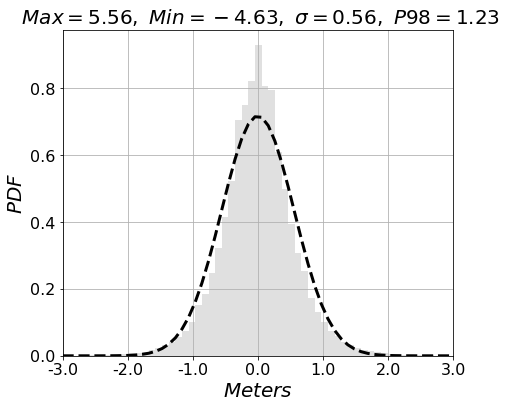

In [25]:
#concatena e plota os valores de heave

pathnameraw = os.environ['HOME'] + '/Dropbox/database/PNBOIA/rio_grande/HNE/'

lista = np.sort(os.listdir(pathnameraw))
lista

lista1 = lista[pl.find(lista == '201202010100.HNE')[0]:pl.find(lista == '201206302300.HNE')[0]+1]
lista1

heave = pd.Series()
for l in lista1:
    
    rig_heave = pd.read_table(pathnameraw + l,sep='\s+',skiprows=11,names=['time','eta','etay','etax'])
    
    heave = pd.concat([heave, rig_heave.eta])

eta_mat = heave.values

fsz = 20

fig, ax = pl.subplots(figsize=(7,6))
p98 = np.percentile(eta_mat,98)
(mu, sigma) = norm.fit(eta_mat) #ajusta a melhor curva para os dados #media e despad?
n, bins, patches = ax.hist(eta_mat,100,normed=1,facecolor='lightgray',alpha=0.7)
y = mlab.normpdf( bins, mu, sigma)
l = ax.plot(bins, y, 'k--',linewidth=3)
ax.set_title(r'$\mathrm{}\ Max=%.2f,\ Min=%.2f,\ \sigma=%.2f,\ P98=%.2f$' %(eta_mat.max(), eta_mat.min(), sigma, p98 ),fontsize=fsz)
ax.set_xlabel(r'$Meters$',fontsize=fsz)
ax.set_ylabel(r'$PDF$',fontsize=fsz)
ax.grid()
ax.axis('tight')
ax.set_xlim(-3,3)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)

# fig.savefig('../fig/histheave.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# plt.savefig('../doc/rev03/latex/fig/histheave.jpg', format='jpeg', bbox_inches='tight')
fig.savefig(pathname_fig + 'histheave.eps', format='eps', dpi=1200, bbox_inches='tight')

In [34]:
# import numpy as NP
# import matplotlib.pyplot as PLT
# from taylorDiagram import TaylorDiagram

# stdrefs = 48.491

# samples = dict(winter=[[17.831, 0.360, "CCSM CRCM"],
#                        [27.062, 0.360, "CCSM MM5"],
#                        [33.125, 0.585, "CCSM WRFG"],
#                        [25.939, 0.385, "CGCM3 CRCM"]])

# colors = PLT.matplotlib.cm.Set1(NP.linspace(0,1,len(samples['winter'])))

# x95 = [0.05, 13.9] # For Prcp, this is for 95th level (r = 0.195)
# y95 = [0.0, 71.0]
# x99 = [0.05, 19.0] # For Prcp, this is for 99th level (r = 0.254)
# y99 = [0.0, 70.0]

# rects = 221

                                    
# fig = PLT.figure(figsize=(11,8))
# fig.suptitle("Precipitations", size='x-large')

# dia = TaylorDiagram(stdrefs, fig=fig, rect=rects,
#                     label='Reference')

# dia.ax.plot(x95,y95,color='k')
# dia.ax.plot(x99,y99,color='k')

# # Add samples to Taylor diagram
# for i,(stddev,corrcoef,name) in enumerate(samples['winter']):
#     dia.add_sample(stddev, corrcoef,
#                    marker='$%d$' % (i+1), ms=10, ls='',
#                    #mfc='k', mec='k', # B&W
#                    mfc=colors[i], mec=colors[i], # Colors
#                    label=name)

# # Add RMS contours, and label them
# contours = dia.add_contours(levels=5, colors='0.5') # 5 levels
# dia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
# # Tricky: ax is the polar ax (used for plots), _ax is the
# # container (used for layout)
# dia._ax.set_title('winter'.capitalize())

# fig.legend(dia.samplePoints,
#            [ p.get_label() for p in dia.samplePoints ],
#            numpoints=1, prop=dict(size='small'), loc='center')

# fig.tight_layout()

# PLT.savefig('test_taylor_4panel.png')
# PLT.show()